In [196]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pathlib
import pickle
from pathlib import Path
sys.path.append(f"{Path.home()}/morpho_repo")
from local_utils import *

sys.path.append(f"{Path.home()}/morpho_repo")
sys.path.append(f"{Path.home()}/morpho_repo/turing_codebase")
from local_utils import *

from turing.classic_models import create_Brusselator
from pde_solvers.cn import *

> The equations are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

With parameters  :
- $D_u = 0.0016, \quad D_v=0.0135$.
- $A = 4.5$.
- $B = 13.5$.

In [380]:
delta_t = 0.01
Lx = Ly = 4.0
D_U, D_V = 0.01, 1.0#0.0016, 0.0135#0.01, 1.0
#n = (32, 32)
#n = (64, 64)
n = (128, 128)
model = RD_2D_1st_Order(Ds=[D_U, D_V], delta_t=delta_t, Lx=Lx, Ly=Ly, 
                        Ix=n[0], Jy=n[1],
                        boundary_condition=Neumann_Boundary_2D
                        #boundary_condition=Periodic_Boundary_2D
                        # boundary_condition=Diritchlet_Boundary_2D
                       )

In [390]:
??create_Brusselator

In [381]:
A, B = 1.0, 1.5#1.259,2.062#13.5#1.0, 10.0

Brusselator=create_Brusselator(A,B)

cu = np.random.normal(scale=.01, size=(n[0], n[1]))
cv = np.random.normal(scale=.01, size=(n[0], n[1]))
cu += A 
cv += B/A

steps = 500000
sol = model.integrate([cu.flatten(), cv.flatten()] ,Brusselator, steps,record_steps=steps//2)
init_condition = np.stack([cu.flatten(), cv.flatten()])
sol2 = np.stack([init_condition , *[sol[i, ...] for i in range(sol.shape[0])]])

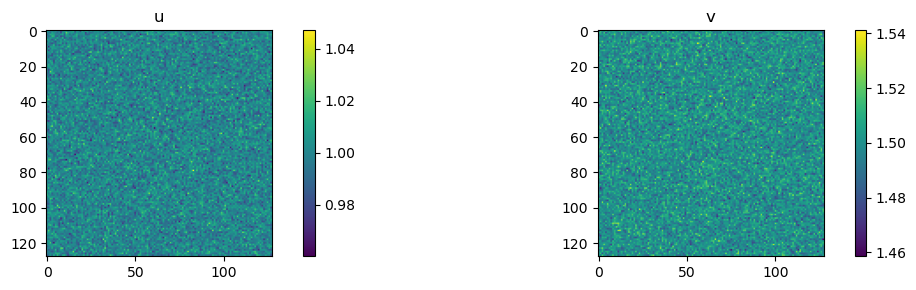

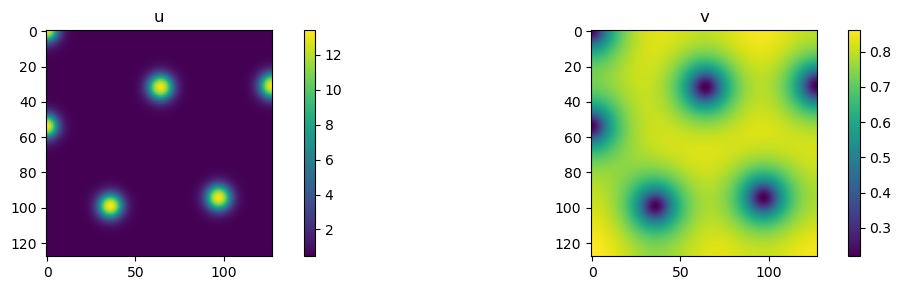

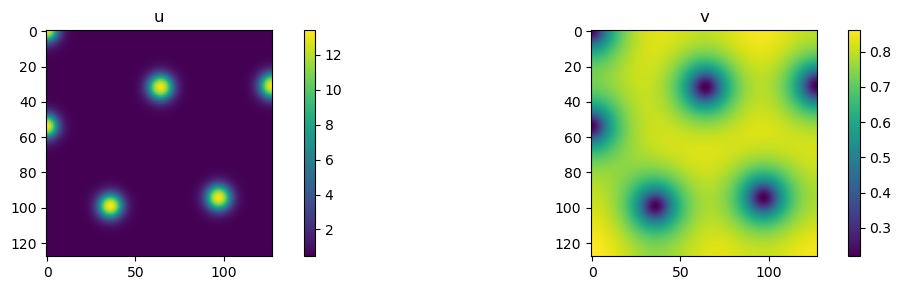

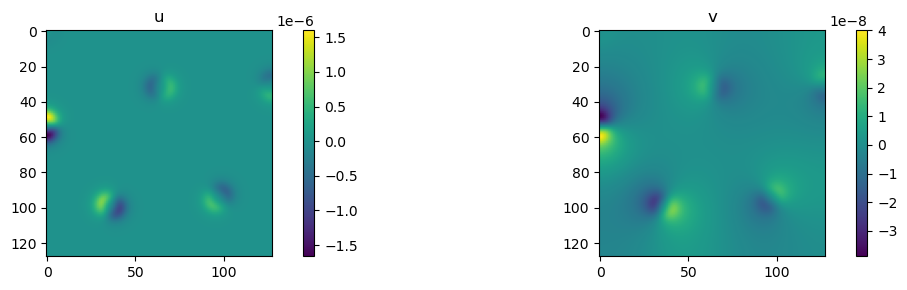

In [382]:
plot_n_im([sol2[0, 0, :].reshape((n[0],n[1])), sol2[0, 1, :].reshape((n[0],n[1]))], 
          ["u", "v"],          
          figsize=(12, 3)); plt.tight_layout();plt.show() 
plot_n_im([sol2[-2, 0, :].reshape((n[0],n[1])), sol2[-2, 1, :].reshape((n[0],n[1]))], 
          ["u", "v"],          
          figsize=(12, 3)); plt.tight_layout();plt.show() 
plot_n_im([sol2[-1, 0, :].reshape((n[0],n[1])), sol2[-1, 1, :].reshape((n[0],n[1]))], 
          ["u", "v"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()
plot_n_im([(sol2[-1, 0, :]-sol2[-2, 0, :]).reshape((n[0],n[1])), 
           (sol2[-1, 1, :]-sol2[-2, 1, :]).reshape((n[0],n[1]))], 
          ["u", "v"],          
          figsize=(12, 3)); plt.tight_layout();plt.show()

In [383]:
params = {"D_U":D_U, "D_V":D_V,
          "A": A, "B":B,
          "n":n[0], 
          "delta_t":delta_t, "Lx":Lx, "Ly":Ly, "T":int(steps*delta_t)}

In [384]:
file_path = f'/turing_Brusselator_4_128_128_d_t_{delta_t:.2f}_n_{n[0]}_L_{Lx:.2f}_T_{int(steps*delta_t)}'.replace(".", "_") + ".npy"
with open('.' + file_path, 'wb') as f:
    np.save(f, sol2)
    
import pickle
file_path2 = f'/turing_Brusselator_params_4_128_128_d_t_{delta_t:.2f}_n_{n[0]}_L_{Lx:.2f}_T_{int(steps*delta_t)}'.replace(".", "_") + ".npy"
with open('.' + file_path2, 'wb') as f:
    pickle.dump(params, f)    

In [385]:
# A, B = 1.0, 0.7#4.0, 11.0#13.5#1.0, 10.0

# Brusselator=create_Brusselator(A,B)

# cu_init = np.random.normal(scale=.1, size=(n[0], n[1]))
# cv_init = np.random.normal(scale=.1, size=(n[0], n[1]))
# cu = A + cu_init
# cv = B/A + cv_init

# steps = 50000
# sol = model.integrate([cu.flatten(), cv.flatten()] ,Brusselator, steps,record_steps=steps//2)
# init_condition = np.stack([cu_init.flatten(), cv_init.flatten()])
# sol2 = np.stack([init_condition , *[sol[i, ...] for i in range(sol.shape[0])]])

In [386]:
# plot_n_im([sol2[-1, 0, :].reshape((n[0],n[1])), sol2[-1, 1, :].reshape((n[0],n[1]))], 
#           ["u", "v"],          
#           figsize=(12, 3)); plt.tight_layout();plt.show()

In [387]:


# A, B = 1.0, 1.5#4.0, 11.0#13.5#1.0, 10.0

# Brusselator=create_Brusselator(A,B)

# cu_init = np.random.normal(scale=.01, size=(n[0], n[1]))
# cv_init = np.random.normal(scale=.01, size=(n[0], n[1]))
# cu = A + cu_init
# cv = B/A + cv_init

# steps = 500000
# sol = model.integrate([cu.flatten(), cv.flatten()] ,Brusselator, steps,record_steps=steps//2)
# init_condition = np.stack([cu_init.flatten(), cv_init.flatten()])
# sol2 = np.stack([init_condition , *[sol[i, ...] for i in range(sol.shape[0])]])


# A, B = 1.0, 0.7#13.5#1.0, 10.0

# Brusselator=create_Brusselator(A,B)


# cu += A + cu_init
# cv += B/A + cv_init

# steps = 500000
# sol = model.integrate([cu.flatten(), cv.flatten()] ,Brusselator, steps,record_steps=steps//2)
# init_condition = np.stack([cu_init.flatten(), cv_init.flatten()])
# sol3 = np.stack([init_condition , *[sol[i, ...] for i in range(sol.shape[0])]])

In [388]:
# print(np.mean(sol2[-1, 0, :]), np.mean(sol2[-1, 1, :]))
# print(np.mean(sol3[-1, 0, :]), np.mean(sol3[-1, 1, :]))

In [389]:

# plot_n_im([sol2[-1, 0, :].reshape((n[0],n[1])), sol2[-1, 1, :].reshape((n[0],n[1]))], 
#           ["u", "v"],          
#           figsize=(12, 3)); plt.tight_layout();plt.show()
# plot_n_im([sol3[-1, 0, :].reshape((n[0],n[1])), sol3[-1, 1, :].reshape((n[0],n[1]))], 
#           ["u", "v"],          
#           figsize=(12, 3)); plt.tight_layout();plt.show()
# plot_n_im([(sol2[-1, 0, :]-sol3[-1, 0, :]).reshape((n[0],n[1])), 
#            (sol2[-1, 1, :]-sol3[-1, 1, :]).reshape((n[0],n[1]))], 
#           ["u", "v"],          
#           figsize=(12, 3)); plt.tight_layout();plt.show()